In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pdf.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
pdf.dtypes[pdf.dtypes=='object']

species    object
island     object
sex        object
dtype: object

In [5]:
strcols = pdf.dtypes[pdf.dtypes == 'object'].index.tolist()
strcols

['species', 'island', 'sex']

In [6]:
numcols = pdf.dtypes[pdf.dtypes != 'object'].index.tolist()
numcols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## find missing entries in each column

In [7]:
pdf.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
pdf.shape[0]

344

In [9]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

-- Fill all missing values

In [10]:
for col in numcols:
  pdf[col]= pdf[col].fillna(pdf[col].mean())

In [11]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.000000
bill_depth_mm        0.000000
flipper_length_mm    0.000000
body_mass_g          0.000000
sex                  3.197674
dtype: float64

In [12]:
pdf2 = pdf[:]
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [13]:
pdf2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [14]:
 pdf2.sex.mode().values[0]

'Male'

In [15]:
pdf2.sex= pdf2.sex.fillna(pdf2.sex.mode().values[0])


In [16]:
100*pdf2.isna().sum()/pdf2.shape[0]

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [17]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## convert Categorical varibales to numericals 


|species|oldvalue| |A|B|C||
|--|--|--|--|--|--|--|
|A|0||1|0|0|A present|
|B|1||0|1|0|B present|
|C|2||0|0|1|C present|
|B|1||0|1|0|B present|
|B|1||0|1|0|B present|
|A|0||1|0|0|A present|
|C|2||0|0|1|C present|
|A|0||1|0|0|A present|


-- Dropping first category

|species|oldvalue| ||B|C||
|--|--|--|--|--|--|--|
|A|0|||0|0|A present|
|B|1|||1|0|B present|
|C|2|||0|1|C present|
|B|1|||1|0|B present|
|B|1|||1|0|B present|
|A|0|||0|0|A present|
|C|2|||0|1|C present|
|A|0|||0|0|A present|


In [18]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [19]:
pdf2['weekday'] = np.random.choice(['sun','mon','tue','wed','thu','fri','sat'],size=pdf2.shape[0])
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,weekday
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,thu
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,tue
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,tue
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,wed
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,sun


In [20]:
pdf2.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [21]:
spcdf = pd.get_dummies(pdf2.species, prefix='spc')

In [22]:
isldf = pd.get_dummies(pdf2.island, prefix='isl')

In [23]:
gendf = pd.get_dummies(pdf2.sex, prefix='gen')

In [24]:
weekdf = pd.get_dummies(pdf2.weekday, prefix='wk')

In [25]:
pdf3 = pd.concat([pdf2, spcdf,isldf,gendf,weekdf], axis=1)

In [26]:
pdf3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,weekday,spc_Adelie,spc_Chinstrap,spc_Gentoo,isl_Biscoe,isl_Dream,isl_Torgersen,gen_Female,gen_Male,wk_fri,wk_mon,wk_sat,wk_sun,wk_thu,wk_tue,wk_wed
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,thu,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,tue,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,tue,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,wed,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,sun,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [27]:
pdf3.drop(columns=['species','island','sex','weekday'], axis=1, inplace=True)
pdf3.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,spc_Adelie,spc_Chinstrap,spc_Gentoo,isl_Biscoe,isl_Dream,isl_Torgersen,gen_Female,gen_Male,wk_fri,wk_mon,wk_sat,wk_sun,wk_thu,wk_tue,wk_wed
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [28]:
pdf3.spc_Adelie.value_counts()

0    192
1    152
Name: spc_Adelie, dtype: int64

In [29]:
pdf3.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
spc_Adelie           0
spc_Chinstrap        0
spc_Gentoo           0
isl_Biscoe           0
isl_Dream            0
isl_Torgersen        0
gen_Female           0
gen_Male             0
wk_fri               0
wk_mon               0
wk_sat               0
wk_sun               0
wk_thu               0
wk_tue               0
wk_wed               0
dtype: int64

-- Extract Train and test dataset

In [30]:
X= pdf3.drop('body_mass_g',axis=1)
y= pdf3.body_mass_g.values.reshape(-1,1)

In [31]:
X.shape,y.shape

((344, 18), (344, 1))

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25, random_state=1234
)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((258, 18), (86, 18), (258, 1), (86, 1))

## Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((258, 18), (258, 1), (86, 18), (86, 1))

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
c = lr_model.intercept_

In [39]:
m = lr_model.coef_

In [40]:
c,m

(array([-1007.61834021]),
 array([[  23.77942774,   80.13812617,   13.40438751, -250.64710496,
         -546.7153828 ,  797.36248776,   40.14157647,  -12.36086793,
          -27.78070854, -168.14462028,  168.14462028,  -44.64773687,
          -44.20928509,    6.42905425,   68.79345039,   11.51610948,
           13.7489871 ,  -11.63057926]]))

In [41]:
X_train.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'spc_Adelie',
       'spc_Chinstrap', 'spc_Gentoo', 'isl_Biscoe', 'isl_Dream',
       'isl_Torgersen', 'gen_Female', 'gen_Male', 'wk_fri', 'wk_mon', 'wk_sat',
       'wk_sun', 'wk_thu', 'wk_tue', 'wk_wed'],
      dtype='object')

In [44]:
dfcoeff = pd.DataFrame({'col':X_train.columns,'coeff':m[0]})
dfcoeff

,col,coeff
0,bill_length_mm,23.779428
1,bill_depth_mm,80.138126
2,flipper_length_mm,13.404388
3,spc_Adelie,-250.647105
4,spc_Chinstrap,-546.715383
5,spc_Gentoo,797.362488
6,isl_Biscoe,40.141576
7,isl_Dream,-12.360868
8,isl_Torgersen,-27.780709
9,gen_Female,-168.144620


In [45]:
dfcoeff['imp']=  dfcoeff.coeff/dfcoeff.coeff.abs().max()
dfcoeff

,col,coeff,imp
0,bill_length_mm,23.779428,0.029823
1,bill_depth_mm,80.138126,0.100504
2,flipper_length_mm,13.404388,0.016811
3,spc_Adelie,-250.647105,-0.314345
4,spc_Chinstrap,-546.715383,-0.685655
5,spc_Gentoo,797.362488,1.000000
6,isl_Biscoe,40.141576,0.050343
7,isl_Dream,-12.360868,-0.015502
8,isl_Torgersen,-27.780709,-0.034841
9,gen_Female,-168.144620,-0.210876


In [46]:
dfcoeff['imp']=  np.sqrt((dfcoeff.coeff/dfcoeff.coeff.abs().max())**2)
dfcoeff.sort_values('imp',ascending=False)

,col,coeff,imp
5,spc_Gentoo,797.362488,1.000000
4,spc_Chinstrap,-546.715383,0.685655
3,spc_Adelie,-250.647105,0.314345
10,gen_Male,168.144620,0.210876
9,gen_Female,-168.144620,0.210876
1,bill_depth_mm,80.138126,0.100504
14,wk_sun,68.793450,0.086276
11,wk_fri,-44.647737,0.055994
12,wk_mon,-44.209285,0.055444
6,isl_Biscoe,40.141576,0.050343


In [47]:
y_learnt_mf = lr_model.predict(X_train)
y_learnt_mf[:5]

array([[3619.61878475],
       [4808.96589511],
       [5208.85834044],
       [3444.24525818],
       [3408.02319607]])

In [48]:
y_train[:5]

array([[3800.],
       [4850.],
       [5300.],
       [3400.],
       [3700.]])

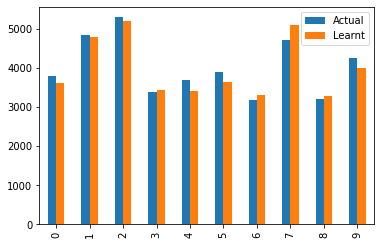

In [49]:
df22 = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt_mf[:,0]})
df22.head(10).plot(kind='bar')

In [50]:
from sklearn.metrics import mean_squared_error as mse

In [51]:
mse_train_mf = mse(y_train , y_learnt_mf)
mse_train_mf

77843.68150319907

In [52]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([[3384.86539052],
       [5362.19633371],
       [4065.61903123],
       [3979.39351834],
       [3448.43542398]])

In [53]:
mse_test_mf = mse(y_test,y_pred)
mse_test_mf

119676.40331575359

# R2 score

In [54]:
mse_base = 802.2336451400918**2
mse_base

643578.8213947586

In [55]:
1-(mse_test_mf/mse_base)

0.8140454605756108

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score_mf = r2_score(y_test,y_pred)
r2_score_mf

0.8140454140684262